In [1081]:
# kaggle random forest 

In [1082]:
# importing relevant libraries

import pandas as pd
import numpy as np

In [1083]:
# Reading both train and test data
train_raw = pd.read_csv('data files/train.csv')
test_raw = pd.read_csv('data files/test.csv')

train_label = pd.DataFrame(train_raw['Survived'])
train_raw = train_raw.drop('Survived', axis=1)

train_id = pd.DataFrame(train_raw['PassengerId'])
test_id = (test_raw['PassengerId'])

In [1084]:
# check the summary of the train data
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [1085]:
# dropping irrelavant columns for classification

# name is irrelavant assuming it is irrelavant to survival rate
train_dataset = train_raw.drop(['Name'], axis = 1, inplace=True)
train_dataset = train_raw.drop(['PassengerId'], axis = 1, inplace=True)
train_dataset = train_raw.drop(['Ticket'], axis = 1, inplace=True)
# Cabin as there is too many missing data.
train_dataset = train_raw.drop(['Cabin'], axis = 1)

In [1086]:
# fill NA values in each column
train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [1087]:
# fill in Age using average method
age_mean = train_dataset['Age'].fillna(train_dataset['Age'].mean())
train_dataset = train_dataset.drop(['Age'], axis = 1).join(age_mean)

# fill in NA values in Embarked column by most frequent entry
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace = True)

# check if train_dataset has no NA values
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Age       891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [1088]:
# OneHotEncode Sex, Ticekt and Embarked to convert variable type that can be accepted as predictor
sex_tmp = pd.get_dummies(train_dataset['Sex'])
train_dataset = train_dataset.join(sex_tmp).drop('Sex', axis = 1)

embarked_tmp = pd.get_dummies(train_dataset['Embarked'])
train_dataset = train_dataset.join(embarked_tmp).drop('Embarked', axis = 1)

# check the columns for the new dataframe created
train_dataset.head()

,Pclass,SibSp,Parch,Fare,Age,female,male,C,Q,S
0,3,1,0,7.2500,22.0,False,True,False,False,True
1,1,1,0,71.2833,38.0,True,False,True,False,False
2,3,0,0,7.9250,26.0,True,False,False,False,True
3,1,1,0,53.1000,35.0,True,False,False,False,True
4,3,0,0,8.0500,35.0,False,True,False,False,True


Index(['Fare', 'Pclass', 'female', 'male'], dtype='object')

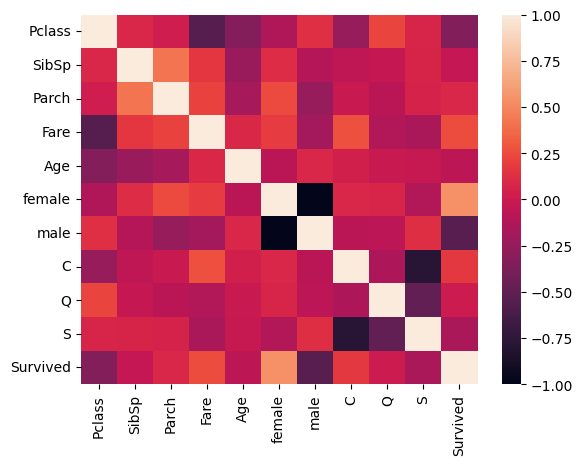

In [1089]:
# Check data Correlation
import seaborn as sns
import matplotlib.pyplot as plt

train_dataset = train_dataset.join(train_label)
sns.heatmap(train_dataset.corr())
check = pd.DataFrame(train_dataset.corr())
train_dataset = train_dataset.drop(['Survived'], axis = 1)

extract_survivor = abs(check.loc[:,'Survived']).sort_values()[6:-1].index
extract_survivor

In [1090]:
train_dataset = train_dataset.loc[:,extract_survivor]
train_dataset

,Fare,Pclass,female,male
0,7.2500,3,False,True
1,71.2833,1,True,False
2,7.9250,3,True,False
3,53.1000,1,True,False
4,8.0500,3,False,True
...,...,...,...,...
886,13.0000,2,False,True
887,30.0000,1,True,False
888,23.4500,3,True,False
889,30.0000,1,False,True


Formatting test dataset

In [1091]:
# dropping irrelavant columns for classification

# name is irrelavant assuming it is irrelavant to survival rate
test_dataset = test_raw.drop(['Name'], axis = 1, inplace=True)
test_dataset = test_raw.drop(['PassengerId'], axis = 1, inplace=True)
test_dataset = test_raw.drop(['Ticket'], axis = 1, inplace=True)
# Cabin as there is too many missing data.
test_dataset = test_raw.drop(['Cabin'], axis = 1)

In [1092]:
# fill in Age using average method
test_dataset['Age'].fillna(test_dataset['Age'].mean(), inplace = True)
test_dataset['Fare'].fillna(test_dataset['Age'].mean(), inplace = True)

# fill in NA values in Embarked column by most frequent entry
test_dataset['Embarked'].fillna(test_dataset['Embarked'].mode()[0], inplace = True)

sex_tmp = pd.get_dummies(test_dataset['Sex'])
test_dataset = test_dataset.join(sex_tmp).drop('Sex', axis = 1)

embarked_tmp = pd.get_dummies(test_dataset['Embarked'])
test_dataset = test_dataset.join(embarked_tmp).drop('Embarked', axis = 1)

test_dataset = test_dataset.loc[:,extract_survivor]
test_dataset

# check if train_dataset has no NA values
test_dataset.head()

,Fare,Pclass,female,male
0,7.8292,3,False,True
1,7.0000,3,True,False
2,9.6875,2,False,True
3,8.6625,3,False,True
4,12.2875,3,True,False


Training Machine Learning Model

In [1093]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1094]:
def predict_output(classifier, test_id, test_dataset):
    predictions_test = []
    for i in range(0, len(test_id)):
        output = str(classifier.predict([test_dataset.iloc[i]]))[1:-1]
                
        predictions_test.append(output)
    predictions_test = [int(i) for i in predictions_test]

    return predictions_test

In [1095]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, train_label, test_size=0.2, random_state=42)

In [1096]:
# Applying Logistic Regression 
i = 0
accuracy_difference = 100
previous = 1



while (accuracy_difference > 0.0005):
    y_pred = []
    logReg = LogisticRegression(random_state= 24*i).fit(X_train, y_train)
    
    for j in range(0, len(y_test)):
        output = str(logReg.predict([X_test.iloc[j]]))[1:-1]
        y_pred.append(output)
        
    accuracy_difference = previous - accuracy_score(y_test, y_pred)
    previous = accuracy_score(y_test, y_pred)
    i += 1
    print("Iteration " + str(i) + " Complete: " + str(previous))
       
check = predict_output(logReg, test_id, test_dataset)
print(test_id)

df4=pd.DataFrame({'Id':test_id,'SalePrice':check})
df4.to_csv("submission.csv", index=False)

Iteration 1 Complete: 0.0


c:\Users\skuramoto1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\skuramoto1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\skuramoto1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\skuramoto1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\skuramoto1\AppData\Local\Programs

ValueError: Found input variables with inconsistent numbers of samples: [179, 358]

In [ ]:
# # Applying Logistic Regression
# logReg = LinearSVC(random_state=0).fit(train_dataset, train_label)
# check = predict_output(logReg, test_id, test_dataset)
# output(test_id, check, 'LinearSVC.csv')